In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
#라이브러리와 app 데이터 세트 로딩
import numpy as np
import pandas as pd
import gc
import time

%matplotlib inline

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import iplot

# 화면크기 설정
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [3]:
# 파일 읽어오기

heart=pd.read_csv("../input/heart-disease-uci/heart.csv")
print('Testing data shape:', heart.shape)
heart.head()

Testing data shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### -columns 값 정의 - 
<span style="font-size:14px"> 1. age : 연령 <br> 2. sex : 성(1=남자, 0=여자) <br> 3. cp : 가슴 통증 유형 (1-4) <br> 4. trestbps : 휴식 혈압 <br> 5. chol : mg/dl의 혈청 콜레스트랄 <br> 6. fbs : 금식 혈당 > 120 mg/dl <br> 7. restecg : 휴식 심전도 결과 (값 0,1,2) <br> 8. thalach : 최대 심박수 달성 <br> 9. exang : 운동 유도 협심증 <br> 10. oldpeak : 올드피크 = ST 우울증은 휴식에 상대적인 운동에 의해 유도<br> 11. slope : 피크 연습 ST 세그먼트의 경사 <br> 12. ca : 밀가루에 의해 착색 된 주요 선박 (0-3)의 수 <br> 13. thal : thal: 3 = 정상; 6 = 고정 결함; 7 = 뒤집을 수 있는 결함 <br> 14. target : 심장마비 발생유무 (1=발생, 0=미발생) </span>

In [5]:
heart.info()
#모든 변수에 대해 결측치가 없음을 확인함 --> 결측치 처리 불필요함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [64]:
# 시각화를 했을 때의 가독성을 위해 column의 이름을 자세히 재구성한다.

heart.columns = ['age','sex','chest_pain','resting_blood_pressure','cholesterol',
                 'fasting_blood_sugar','rest_ecg','max_heart_rate','exercise_angina',
                 'st_depression','st_slope','num_major_vessels','thalassemia','target']

In [65]:
heart.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart1 = heart.copy() # 숫자로 이루어진 파일 복사본

In [68]:
#heart의 각 속성에 맞게 숫자에 해당하는 문자열을 대체한다.

heart.sex = heart.sex.map({0:'female',1:'male'})
heart.chest_pain = heart.chest_pain.map({1:'angina pectoris',2:'atypical angina', 3:'non-anginal pain',4:'SMI', 0:'absent'})
heart.fasting_blood_sugar = heart.fasting_blood_sugar.map({0:'lower than 120mg/ml',1:'greater than 120mg/ml'})
heart.exercise_angina = heart.exercise_angina.map({0:'no', 1:'yes'})
heart.st_slope = heart.st_slope.map({1:'upsloping', 2:'horizontal',3:'downsloping', 0:'absent'})
heart.thalassemia = heart.thalassemia.map({1:'normal', 2:'fixed defect', 3:'reversable defect',0:'absent'})
heart.target = heart.target.map({0:'No Heart Disease',1:'Heart Disease'})

In [69]:
heart.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,0,150,no,2.3,absent,0,normal,Heart Disease
1,37,male,atypical angina,130,250,lower than 120mg/ml,1,187,no,3.5,absent,0,fixed defect,Heart Disease
2,41,female,angina pectoris,130,204,lower than 120mg/ml,0,172,no,1.4,horizontal,0,fixed defect,Heart Disease
3,56,male,angina pectoris,120,236,lower than 120mg/ml,1,178,no,0.8,horizontal,0,fixed defect,Heart Disease
4,57,female,absent,120,354,lower than 120mg/ml,1,163,yes,0.6,horizontal,0,fixed defect,Heart Disease


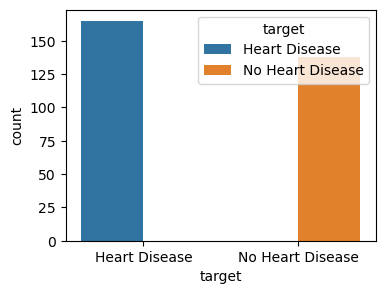

In [12]:
#심장질환 발병전체건수
plt.figure(figsize=(4,3))
sns.countplot(x="target", data=heart, hue="target")
plt.show()

#### Age, Sex 열

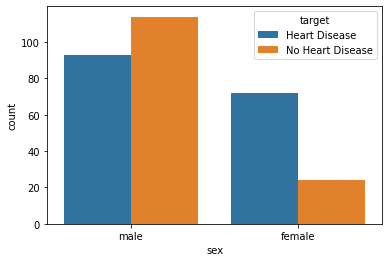

In [12]:
#성별에 따른 심장질환 발병건수
plt.figure(figsize=(4,3))
sns.countplot(x="sex", data=heart, hue="target")
plt.show()

In [13]:
# 연령대에 따른 심장 질환 분포도
data = [heart['age']]
group = ['age'] 

# 'thalassemia' 히스토그램 
fig = ff.create_distplot(data, group_labels=group,bin_size=10,show_rug=False)
fig.update_layout(width=700, title_text='연령별 분포도')
fig.show()

<Figure size 800x800 with 0 Axes>

<span style='font-size:14px'> - result 해석 <br> - 연령 분포는 정규 분포에 가깝게 보임. <br> - 이 데이터의 환자 연령은 29-77세로 특정 유형에 치우치지 않음.

In [14]:
# 성별에 따른 나이와 심장질환의 상관관계 (막대그래프)
fig = px.bar(heart, x=heart['target'], y=heart['age'], color='sex', height=500, width=800)
fig.update_layout(title_text='성별에 따른 나이와 심장질환의 상관관계(막대그래프)')
fig.show()

<Figure size 400x300 with 0 Axes>

- result 해석
- 심장병을 앓고 있는 사람과 심장병을 앓고 있지 않은 사람은 나이가 거의 비슷함.
- 심장병을 앓고 있는 남녀 환자의 수가 거의 같음.

In [15]:
# 성별에 따른 나이와 심장질환의 상관관계 (박스플랏)

fig = px.box(heart, x="target", y="age", points="all", color='sex')
fig.update_layout(title_text='성별을 기반으로 한 나이 VS 심장질환')
fig.show()

<span style='font-size:14px'> - result 해석 <br>- 심장질환이 없는 환자의 연령 중간값은 심장질환 환자보다 약간 높음.

### Chest Pain

<Axes: xlabel='chest_pain', ylabel='count'>

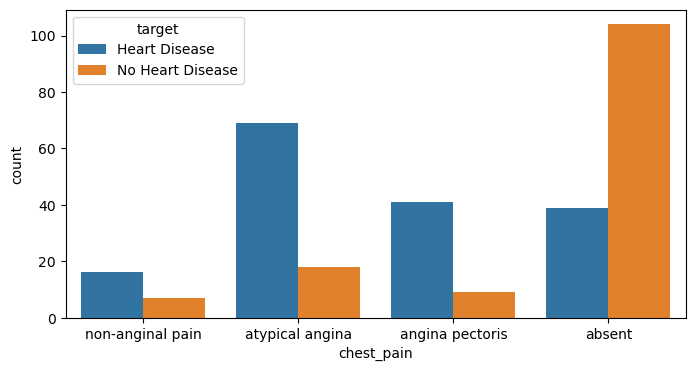

In [19]:
# 심장질환자와 비심장질환자의 흉통유형수
plt.figure(figsize=(8,4))
sns.countplot(x="chest_pain", hue="target", data=heart)

<span style='font-size:14px'> - result 해석 <br> - 가장 흔한 흉통 유형은 "atypical agina"이고, "agina pectoris"가 다음이다. <br> - 40명 정도의 환자가 가슴통증은 없지만 여전히 심장병을 앓고 있다는 것을 알 수 있기 때문에 가슴통증이 없다고 해서 환자가 심장병이 없다는 것을 보장할 수는 없다.

<Axes: xlabel='chest_pain', ylabel='count'>

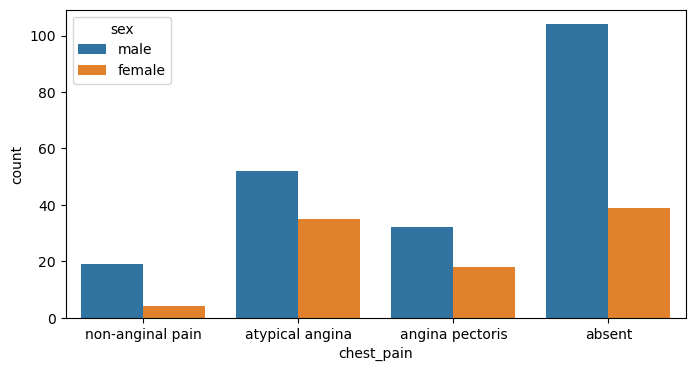

In [20]:
# 남성/여성 환자의 흉통유형수
plt.figure(figsize=(8,4))
sns.countplot(x="chest_pain", hue="sex", data=heart)

<span style='font-size:14px'> - result 해석 <br> - 가슴에 통증이 없는 남성 환자 > 여성 환자

### Resting Blood Pressure

In [21]:
# 휴식기 혈압에 따른 심장 질환 분포도
data = [heart['resting_blood_pressure']]
group = ['resting_blood_pressure'] 

# 'thalassemia' 히스토그램 
fig = ff.create_distplot(data, group_labels=group,bin_size=10,show_rug=False)
fig.update_layout(width=700, title_text='휴식기 혈압별 분포도')
fig.show()

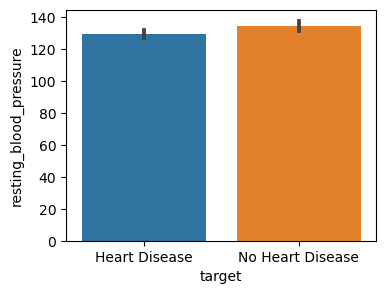

In [22]:
# 휴식기 혈압과 심장질환의 상관관계 (막대그래프)
plt.figure(figsize=(4,3))
sns.barplot(x="target", y='resting_blood_pressure',data = heart)
plt.show()

In [23]:
# 휴식기 혈압과 심장질환의 상관관계(박스플랏)

fig = px.box(heart, x="target", y="resting_blood_pressure", points="all", color='sex')
fig.update_layout(title_text='휴식기 혈압과 심장질환의 상관관계')
fig.show()

<span style='font-size:14px'> - result 해석 <br> - 휴식기 혈압 분포는 정상 분포에 가깝다.<br> - 심장질환 환자와 비심장질환 환자의 휴식기 혈압은 비슷하다. <br> - 심장질환이 있는 중간 휴식기 혈압 = 남성(130) / 여성(130) <br>- 심장질환이 없는 중간 휴식기 혈압 = 남성(130) / 여성(140)

### Cholesterol

In [24]:
# 콜레스테롤에 따른 심장 질환 분포도
data = [heart['cholesterol']]
group = ['cholesterol'] 

# 'thalassemia' 히스토그램 
fig = ff.create_distplot(data, group_labels=group,bin_size=10,show_rug=False)
fig.update_layout(width=700, title_text='콜레스테롤별 분포도')
fig.show()

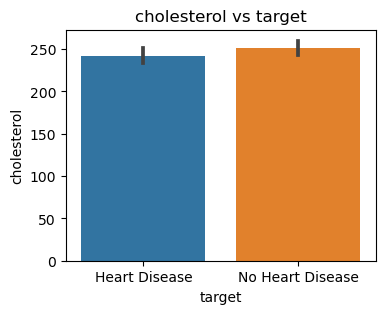

In [25]:
# 콜레스테롤과 심장질환의 상관관계 (막대그래프)
plt.figure(figsize=(4,3))
sns.barplot(x="target", y='cholesterol',data=heart)
plt.title('cholesterol vs target')
plt.show()

In [26]:
# 성별을 기반으로 한 콜레스테롤과 심장질환의 상관관계 (박스플랏)

fig = px.box(heart, x="target", y="cholesterol", points="all", color='sex')
fig.update_layout(title_text='성별을 기반으로 한 콜레스테롤과 심장질환의 상관관계')
fig.show()

In [27]:
# 세그먼트 경사를 기반으로 한 콜레스테롤과 심장질환의 상관관계 (박스플랏)

fig = px.box(heart,x="target",y="cholesterol",
             points="all",color='st_slope')
fig.update_layout(title_text='세그먼트 경사를 기반으로 한 콜레스테롤과 심장질환의 상관관계 ')
fig.show()

<span style='font-size:14px'> - result 해석 <br> - 혈청 콜레스테롤의 분포는 정상 분포에 가깝고 꼬리가 길다. <br> - 심장질환 환자와 비심장질환 환자의 휴식기 혈압은 거의 같다.<br> - 심장질환이 있는 중간 콜레스테롤 = 남성(228) / 여성(249) <br> - 심장질환이 없는 중간 콜레스테롤 = 남성(247.5) / 여성(265.5)<br>- 세그먼트 경사는 차이가 별로 없음.

### Fasting Blood sugar

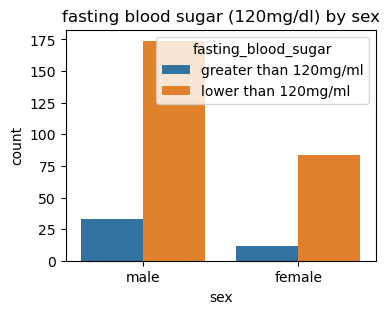

In [28]:
# 공복 혈당이 120mg/dl 이상, 120mg/dl 미만인 남녀 환자의 수
plt.figure(figsize=(4,3))
sns.countplot(hue='fasting_blood_sugar',x ='sex',data = heart)
plt.title('fasting blood sugar (120mg/dl) by sex')
plt.show()

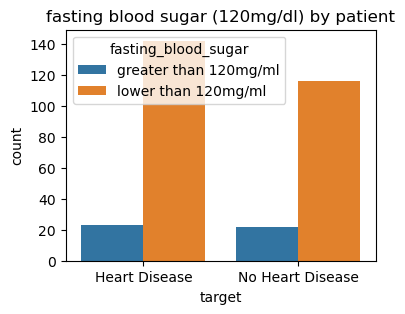

In [29]:
# 공복 혈당이 120mg/dl 이상, 120mg/dl 미만인 심장질환 환자, 비심장질환 환자의 수
plt.figure(figsize=(4,3))
sns.countplot(hue='fasting_blood_sugar',x ='target',data = heart)
plt.title('fasting blood sugar (120mg/dl) by patient')
plt.show()

<span style='font-size:14px'> - result 해석<br>- 공복 혈당이 120mg/dl 미만인 환자는 심장질환을 앓을 가능성이 높음<br>- 여성 환자에 비해 120 mg/dl 이상을 먹는 남성 환자가 더 많다.

### ECG

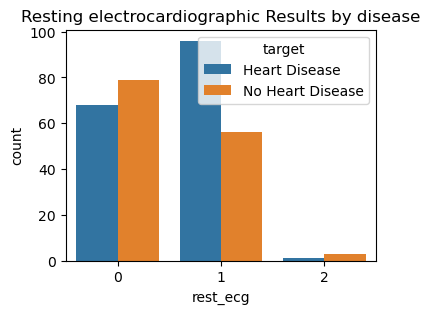

In [30]:
# 휴식기 심전도 결과 (values 0,1,2) by disease)
plt.figure(figsize=(4,3))
sns.countplot(x='rest_ecg', hue ='target', data = heart)
plt.title('Resting electrocardiographic Results by disease')
plt.show()

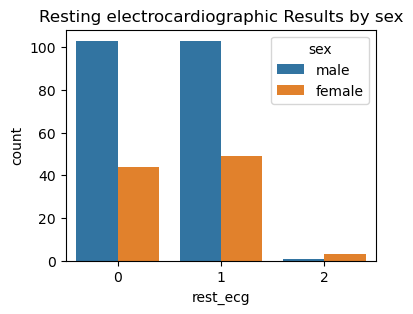

In [31]:
# 휴식기 심전도 결과 (values 0,1,2) by sex)
plt.figure(figsize=(4,3))
sns.countplot(x='rest_ecg', hue ='sex', data = heart)
plt.title('Resting electrocardiographic Results by sex')
plt.show()

<span style='font-size:14px'>- result 해석 <br> - 휴식기 심전도가 1인, 즉 심장질환을 앓고 있는 환자가 많다. <br>- rest_computer(2)는 매우 적다. <br> - rest_hyp(0), rest_hyp(1)은 남성 환자에게 더 많이 발견된다.

### Thalassemia

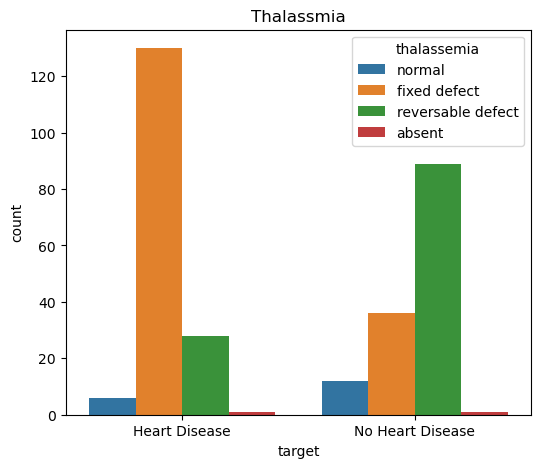

In [32]:
# 심장질환 기반 Thalassemia 유형 (막대그래프)
plt.figure(figsize=(6,5))
sns.countplot(hue='thalassemia',x ='target',data = heart)
plt.title('Thalassmia')
plt.show()

<Axes: xlabel='chest_pain', ylabel='count'>

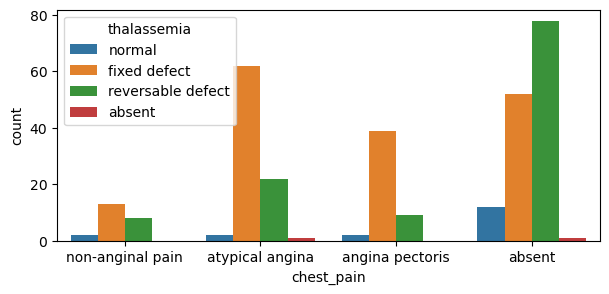

In [36]:
# 가슴통증 기반 Thalassemia 유형 
plt.figure(figsize=(7,3))
sns.countplot(x="chest_pain", hue="thalassemia", data=heart)

<Axes: xlabel='st_slope', ylabel='count'>

<Figure size 400x300 with 0 Axes>

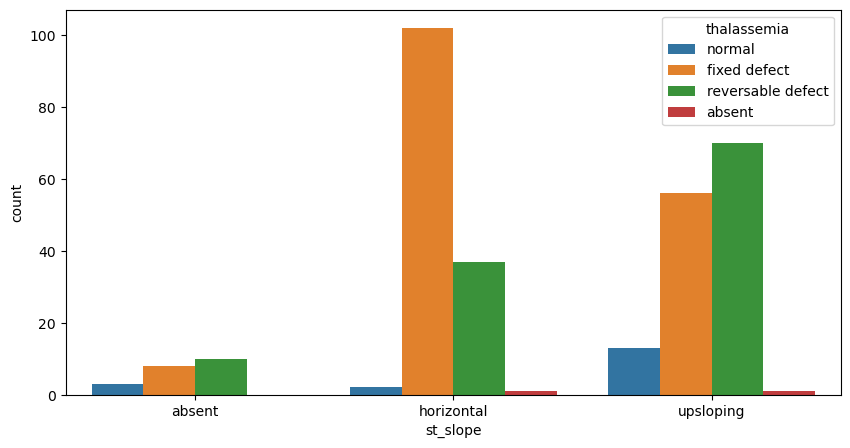

In [33]:
# 세그먼트 경사 기반 Thalassemia 유형
plt.figure(figsize=(4,3))
plt.figure(figsize=(10,5))
sns.countplot(x="st_slope", hue="thalassemia", data=heart)

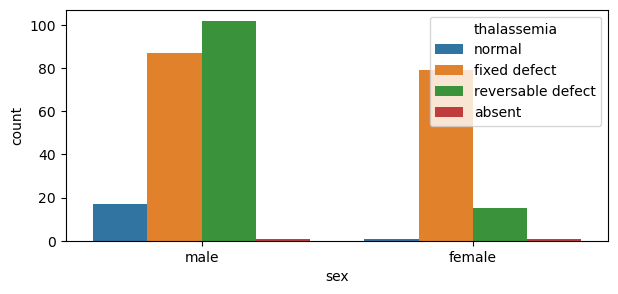

In [38]:
# 성별 기반 Thalassemia 유형
plt.figure(figsize=(7,3))
sns.countplot(hue='thalassemia',x ='sex',data =heart)
plt.show()

<span style='font-size:14px'> - result 해석 <br><br> - 심장병의 유무와 무관하게 대부분의 환자들이 Thalassemia를 앓음.<br>- fixed defect Thalassemia는 심장질환 환자에게서 더 흔하며, reversable defect Thalassemia는 심장질환이 없는 환자에게서 더 흔하다.<br> - 모든 유형의 흉통에서 fixed defect Thalassemia 환자가 더 많은 반면 흉통이 없는 환자와 reversable defect Thalassemia는 매우 일반적이다.<br> - fixed defect Thalassemia는 남성과 여성 환자 사이에서 매우 흔하지만 여성 환자에 비해 reversable defect Thalassemia 남성 환자가 매우 많다.<br>- horizontal slope 환자 중 fixed defect Thalassemia는 다른 환자보다 더 일반적인 반면, upsloping 환자의 경우 reversable defect Thalassemia 환자 수가 더 많다.

### feature engineering
<br> - feature들에 대해 TATGET값 분포도 비교 시각화

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import scikitplot as skplt
from sklearn.metrics import accuracy_score

<span style='font-size:14px'> 정확도를 올리기 위해 범주형 변수를 더미 변수화한다

In [74]:
heart1.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [75]:
heart.head()

,age,sex,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,male,non-anginal pain,145,233,greater than 120mg/ml,0,150,no,2.3,absent,0,normal,Heart Disease
1,37,male,atypical angina,130,250,lower than 120mg/ml,1,187,no,3.5,absent,0,fixed defect,Heart Disease
2,41,female,angina pectoris,130,204,lower than 120mg/ml,0,172,no,1.4,horizontal,0,fixed defect,Heart Disease
3,56,male,angina pectoris,120,236,lower than 120mg/ml,1,178,no,0.8,horizontal,0,fixed defect,Heart Disease
4,57,female,absent,120,354,lower than 120mg/ml,1,163,yes,0.6,horizontal,0,fixed defect,Heart Disease


In [76]:
heart.columns

Index(['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate', 'exercise_angina',
       'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia',
       'target'],
      dtype='object')

In [78]:
heart.sex = heart.sex.map({'female':0,'male':1})
# heart.chest_pain = heart.chest_pain.map({1:'angina pectoris',2:'atypical angina', 3:'non-anginal pain',4:'SMI', 0:'absent'})
heart.fasting_blood_sugar = heart.fasting_blood_sugar.map({'lower than 120mg/ml':0,'greater than 120mg/ml':1})
heart.exercise_angina = heart.exercise_angina.map({'no':0, 'yes':1})
# heart.st_slope = heart.st_slope.map({1:'upsloping', 2:'horizontal',3:'downsloping', 0:'absent'})
# heart.thalassemia = heart.thalassemia.map({1:'normal', 2:'fixed defect', 3:'reversable defect',0:'absent'})
heart.target = heart.target.map({'No Heart Disease':0,'Heart Disease':1})
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    int64  
 1   sex                     303 non-null    int64  
 2   chest_pain              303 non-null    object 
 3   resting_blood_pressure  303 non-null    int64  
 4   cholesterol             303 non-null    int64  
 5   fasting_blood_sugar     303 non-null    int64  
 6   rest_ecg                303 non-null    int64  
 7   max_heart_rate          303 non-null    int64  
 8   exercise_angina         303 non-null    int64  
 9   st_depression           303 non-null    float64
 10  st_slope                303 non-null    object 
 11  num_major_vessels       303 non-null    int64  
 12  thalassemia             303 non-null    object 
 13  target                  303 non-null    int64  
dtypes: float64(1), int64(10), object(3)
memory

In [79]:
final = pd.get_dummies(heart)
final

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_angina,st_depression,num_major_vessels,target,chest_pain_absent,chest_pain_angina pectoris,chest_pain_atypical angina,chest_pain_non-anginal pain,st_slope_absent,st_slope_horizontal,st_slope_upsloping,thalassemia_absent,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,1,0,0,0,0,1,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,1,0,0,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,1,0,0,1,0,0
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,1,0,0,1,0,0
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,0,1,0,0,0,0,0,1,0,0,0,1
299,45,1,110,264,0,1,132,0,1.2,0,0,0,0,0,1,0,0,1,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,2,0,1,0,0,0,0,0,1,0,0,0,1
301,57,1,130,131,0,1,115,1,1.2,1,0,1,0,0,0,0,0,1,0,0,0,1


In [80]:
x = final.drop(['target'], axis = 1)
y = final['target']

In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20, random_state = 5)

In [82]:
feature_scaler = MinMaxScaler()
x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.fit_transform(x_test)

In [83]:
# 정확도는 리스트로 설정
accuracy = []

## Decision Trees

In [84]:
criterion = ['gini','entropy']
splitter = ['best','random']

Tree = DecisionTreeClassifier()

parameters = {'criterion': ['gini','entropy']}

tree_classifier = GridSearchCV(Tree, parameters, scoring='neg_mean_squared_error' ,cv =5)
tree_classifier.fit(x_train, y_train)
tree_classifier.best_params_

{'criterion': 'gini'}

In [85]:
model2 = DecisionTreeClassifier(criterion = 'gini')
model2.fit(x_train,y_train)
accuracy2 = model2.score(x_test,y_test)
accuracy.append(accuracy2)
print('Decision Tree Accuracy -->',((accuracy2)*100))

Decision Tree Accuracy --> 75.40983606557377


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

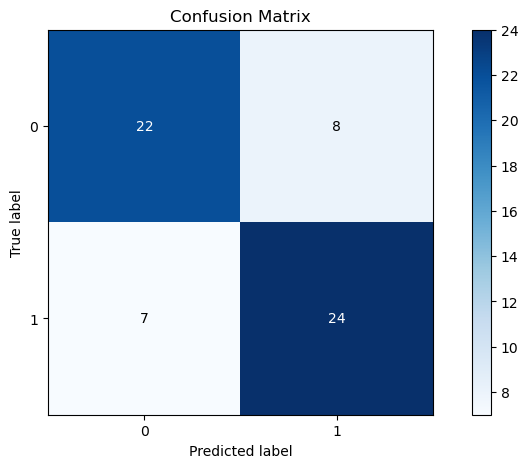

In [86]:
pred2 = model2.predict(x_test)
matrix2 = (y_test,pred2)
skplt.metrics.plot_confusion_matrix(y_test ,pred2 ,figsize=(10,5))

- result 해석
- 이 결과로 15개의 값에 오류가 있음을 보여주고, 다른 값은 모두 올바르게 예측되었음을 보여줌.

## K-Nearest Neighbors

Text(0, 0.5, 'Accuracy')

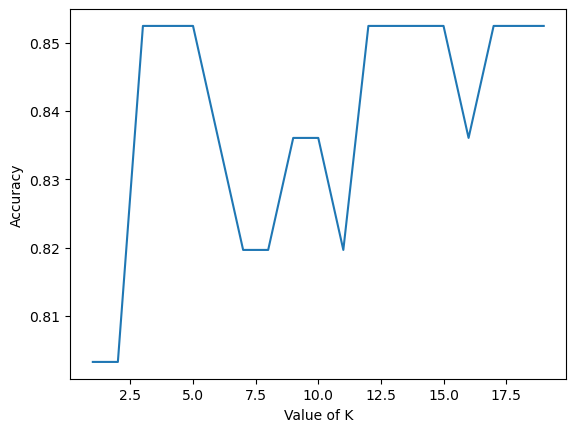

In [87]:
Krange = range(1,20)
scores = {}
scores_list = []
for k in Krange:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
plt.plot(Krange,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [88]:
model8 = KNeighborsClassifier(n_neighbors = 5)
model8.fit(x_train,y_train)
accuracy8 = model8.score(x_test,y_test)
accuracy.append(accuracy8)
print('Gradient Boosting Classifier Accuracy -->',((accuracy8)*100))

Gradient Boosting Classifier Accuracy --> 85.24590163934425


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

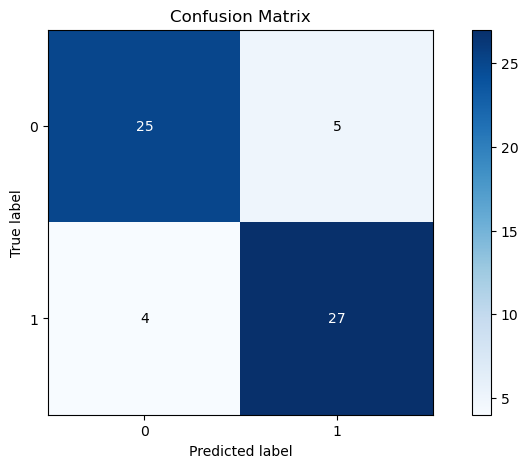

In [89]:
pred8 = model8.predict(x_test)
matrix8 = (y_test,pred8)
skplt.metrics.plot_confusion_matrix(y_test ,pred8 ,figsize=(10,5))

- result 해석
- 이 결과로 9개의 값에 오류가 있음을 보여주고, 다른 값은 모두 올바르게 예측되었음을 보여줌.